# S&P 500 stock performance in pandemic and portfolio optimization

*Research Questions:*
1. ***Dataset Exploration:*** *How does each stocks and the S&P 500 perform during the pandemic? What factors, including pandemic-related data, affected stock prices, and can machine learning models explain these influences?*

    The total S&P 500 return during the pandemic is 36.19%. The best-performing stock is SMCI(847.74%), and the worst-performing stock is CCL(-77.86%). In total, 190 stocks outperform the S&P 500, and 313 stocks underperform S&P 500. For investors, the best month is the April of 2020, whereas the worst month is the March of 2020. After manually testing several different combinations of independent variables, taking the log value of new COVID cases and risk-free rates is the best-performing model. The coefficients suggest that the two independent variables are positively related to the stock price. R-squared 0.531 represents approximately 53.1% of the variance in the dependent variable is explained by the independent variables.

2. ***Data clustering:*** *Cluster the data using different methods (Hierarchical Clustering or K-means clustering) and observe the construction of each cluster. What industry accounts for the largest share in each cluster? How many observations are in each cluster, and how did each cluster perform differently during the pandemic?*

   After comparing the clusters using two different methods, I found that they generates similar results. Cluster 0 has 211 stocks, with Technology and Industrial sectors having the largest share. Consumer Cyclical sector and Healthcare sector combined to account for 25% of the cluster. Cluster 0 demonstrates an average monthly return of 1.4% during the pandemic. Cluster 1 has 161 stocks, with Financial Services sector accounting for the largest portion of this cluster. Cluster 1 demonstrates an average monthly return of 0.942% during the pandemic. Cluster2 has 102 stocks in cluster 2. Healthcare sector, Utilities sector, and Consumer Defense sector account for 26.5%, 23.5%, and 22.5% of the cluster, respectively. Cluster 2 demonstrates an average monthly return of 0.773% during the pandemic and it is the most stable cluster. Cluster 3 has 24 stocks, with Energy and Consumer Cyclical being the only two sectors in this cluster. Cluster 3 demonstrates an average monthly return of 2.53% during the pandemic and it is the most volatile cluster.

3. ***Portfolio Optimization:*** *How would investors use clusters to optimize and diversify their $1M portfolio? Propose two portfolios for a risk-averse investor and a risk-seeking investor respectively and observe how each of them fluctuates during the pandemic.*

    Each cluster demonstrates a unique pattern of fluctuation. From the graph we can see that cluster 3 is the most volatile cluster. A risk-seeking investor tends to favor stocks in this cluster to maximize its profits. In contrast, a risk-averse investor avoids including this kind of stock in the portfolio. In addition, beta is a indication to understand the stock's correlation with the whole market. The market's beta equals to 1, and the higher the stock is, the higher the volatility is. In this project I simply choose the highest ten beta stocks for risk-seeking investors and the lowest ten beta stocks for risk-averse investors. But it is not the most common way to optimize portfolio in the real world. After calculation, the risk-averse portfolio generates a return of 5.8% and the risk-seeking portfilio generates a return of 209% during the pandemic.

## Challenge Goals

***Multiple Datasets:*** In this project I will use at least four datasets, including COVID-19 data from Kaggle, S&P 500 historical price data from Kaggle, a list of S&P 500 companies from Kaggle, and stock information from Yahoo Finance. The first two datasets will be merged to calculate the daily return in question 1 and the return data will be used in question 2 to do the clustering.

***Advanced Machine Learning:*** This project will apply multiple machine learning models to gain valuable insights. Linear regression model and Decision Tree can be used in the first question to see the correlation between the stock return and various features, like EBITDA and the Covid-19 data. Hierarchical Clustering or K-means clustering algorithm will be applied in question 2 to build the cluster across industries.
*

## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [107]:
your_name = "Joshua Chen"
sources = [
    "Groupby and Indexing lecture", "spreadsheet lecture", "learning algorithms lecture", "Data Settings",
    "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html",
    "https://www.programiz.com/python-programming/datetime/strftime"
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

## Data Setting and Methods

***Data on COVID-19:*** This dataset includes the COVID-19 cases and deaths in 207 countries from December 2019 to October 2023. I hope to observe how COVID-19 originating from Asia affects the US stock market and how the stock price was correlated with the COVID-19 numbers.

***S&P 500 historical price:*** It will be obtained through Kaggle. The dataset contains day-to-day open and close prices from 2010 to present. I will calculate daily returns for the S&P 500 companies. Return is the key metric used in the project to build the portfolio.

***List of S&P 500 companies:*** This dataset contains the company name, symbol, sector, industry, market cap, and EBITDA. They are useful features because they combined price data to show the performance of companies in various industries during the pandemic, helping me develop the stock-picking strategy.

***Stock information:*** This dataset will be obtained through Yahoo Finance. Beta is the main information I need as it implies the diversification of the portfolio and allows me to use the CAPM to evaluate the portfolio. 

***Risk-free Rate:*** This dataset will be obtained through Kaggle. Risk-free rate is an essential part in the CAPM formula and I use 10-year treasury yield as the risk-free rate.*

## Results

### Step 1: Data Collection and Preprocessing(Research Question 1)

In [2]:
import pandas as pd
import doctest
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io

In [3]:
!pip install yfinance
import yfinance as yf

  Using cached yfinance-0.2.41-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (23 kB)
  Using cached peewee-3.17.6-cp310-cp310-linux_x86_64.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.41-py2.py3-none-any.whl (73 kB)
Using cached frozendict-2.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (117 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


This step aims to read the four dataframes and access the useful features. 

`sp500_companies.csv` file contains a list of companies in the S&P 500. Each row in the dataframe corresponds to a stock's basic information. Three columns in this dataframe will be used in the project:
- `Symbol` is the ticker of the stock.
- `Sector` is the primary industry the company is in.
- `Industry` is the secondary industry the company is in.

`sp500_stocks.csv` file contains the historical price of each stock. Each row in the dataframe corresponds to a stock's daily price. Only the adjusted close price will be used in the project:
- `Adj Close` is the everyday stock price accounting for corporate actions such as dividends, stock splits, and other events, providing a more accurate representation of the stock’s value over time. In this project, I will only consider the price during the pandemic (between January 2020 and May 2023).

`owid-covid-data.csv` file contains a wide range of Covid-19 information. Each row represents the daily Covid-19 updates. Only the `new_cases` column will be used in this project.

`yield-curve-rates-1990-2023.csv.csv` file contains the 10-year treasury yield information. Each row represents the daily updated 10-year treasury yield.


#### List of S&P 500 companies

In [4]:
#read the S&P 500 company list
company_list = pd.read_csv("sp500_companies.csv")

In [5]:
#only select useful features
stock_sector = company_list[["Symbol", "Sector", "Industry"]]
stock_sector

,Symbol,Sector,Industry
0,AAPL,Technology,Consumer Electronics
1,MSFT,Technology,Software - Infrastructure
2,NVDA,Technology,Semiconductors
3,GOOG,Communication Services,Internet Content & Information
4,GOOGL,Communication Services,Internet Content & Information
...,...,...,...
498,BBWI,Consumer Cyclical,Specialty Retail
499,IVZ,Financial Services,Asset Management
500,NCLH,Consumer Cyclical,Travel Services
501,ETSY,Consumer Cyclical,Internet Retail


#### S&P 500 historical price

In [6]:
#read the S&P 500 historical price
stock_price = pd.read_csv("sp500_stocks.csv")
#convert the entries(str) in the date column into DateTime objects
stock_price["Date"] = pd.to_datetime(stock_price["Date"])
#filter the Covid-19 entries
start_date = '2020-01-01'
end_date = '2023-05-31'
stock_price_covid = stock_price[(stock_price["Date"] >= start_date) & (stock_price["Date"] <= end_date)]
#select only useful features
stock_price_covid = stock_price_covid[["Date", "Symbol", "Adj Close"]]
stock_price_covid = stock_price_covid.set_index('Date')
stock_price_covid

,Symbol,Adj Close
Date,,
2020-01-02,MMM,124.281357
2020-01-03,MMM,123.211136
2020-01-06,MMM,123.328522
2020-01-07,MMM,122.831352
2020-01-08,MMM,124.716316
...,...,...
2023-05-24,ZTS,167.109619
2023-05-25,ZTS,163.256439
2023-05-26,ZTS,162.762451


#### Data on COVID-19

In [7]:
#read the Covid information
covid_info = pd.read_csv("owid-covid-data.csv")

In [8]:
#select useful columns during the pandemic
covid_info['date'] = pd.to_datetime(covid_info['date'])
start_date = '2020-01-01'
end_date = '2023-05-31'
covid_info = covid_info[(covid_info["date"] >= start_date) & (covid_info["date"] <= end_date)]
#select only useful features
covid_data = covid_info.loc[:,['date', 'new_cases']]
covid_data = covid_data.groupby('date').sum()
covid_data

,new_cases
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,14.0
2020-01-05,0.0
...,...
2023-05-27,112041.0
2023-05-28,522416.0
2023-05-29,385314.0


#### Testing list

In [10]:
#testing list
big7_tickers = ["GOOG", "AMZN", "AAPL", "META", "MSFT", "NVDA", "TSLA"]

In [14]:
test_price = stock_price(big7_tickers[0], '2020-01-01','2020-01-04')
test_price['Symbol'] = big7_tickers[0]

[*********************100%%**********************]  1 of 1 completed


In [19]:
test_return = calculate_return(test_price, horizon = 'D')

In [20]:
test_sector_return = merge_sector_return(test_return, stock_sector)

In [21]:
test_price_df = stock_price_covid[stock_price_covid['Symbol'].isin(big7_tickers)]
test_total_sector_return = merge_sector_return(calculate_return(test_price_df), stock_sector)


#### Stock Information

In [22]:
def stock_beta(ticker_list):
    """
    Takes in a list of tickers and returns a dictionary that assigns each 
    ticker with the beta of the stock.
    """
    beta_dict = {}
    for ticker in ticker_list:
        stock = yf.Ticker(ticker)
        stock_info = stock.info
        beta = stock_info.get('beta')
        beta_dict[ticker] = beta

    return beta_dict

assert stock_beta(big7_tickers) == {'GOOG': 1.046,
     'AMZN': 1.155,
     'AAPL': 1.244,
     'META': 1.212,
     'MSFT': 0.894,
     'NVDA': 1.68,
     'TSLA': 2.313}

In [23]:
def stock_price(ticker, start_date, end_date):
    """
    Takes in a ticker(str) and returns a dataframe containing the historical
    stock prices retrieved from yahoo Finance.
    """
    data = yf.download(ticker, start_date, end_date)
    
    return data.loc[:, "Adj Close"].to_frame()

assert stock_price(big7_tickers[0], '2020-01-01','2020-01-03')['Adj Close'].iloc[0] == 68.29078674316406

[*********************100%%**********************]  1 of 1 completed


In [24]:
#access the S&P 500 price during the pandemic
SP_500_price_covid = stock_price('SPY','2020-01-01','2023-05-31')
SP_500_price_covid["Symbol"] = "SPX"
SP_500_price_covid

[*********************100%%**********************]  1 of 1 completed


,Adj Close,Symbol
Date,,
2020-01-02,303.135529,SPX
2020-01-03,300.840210,SPX
2020-01-06,301.987946,SPX
2020-01-07,301.138733,SPX
2020-01-08,302.743744,SPX
...,...,...
2023-05-23,406.866486,SPX
2023-05-24,403.918823,SPX
2023-05-25,407.416748,SPX


#### Risk-free Rate

In [38]:
#read the 10 year treasury daily updates
rf_rate_df = pd.read_csv("yield-curve-rates-1990-2023.csv.csv")

In [39]:
#keep the useful columns
ten_yr_rate = rf_rate_df.loc[:,["Date", "10 Yr"]]
ten_yr_rate.rename(columns={'10 Yr': 'ten_yr_rate'}, inplace=True)
ten_yr_rate['Date'] = pd.to_datetime(ten_yr_rate['Date'], errors='coerce')
#select the data during the pandemic
start_date = '2020-01-01'
end_date = '2023-05-31'
ten_yr_rate = ten_yr_rate[(ten_yr_rate["Date"] >= start_date) & (ten_yr_rate["Date"] <= end_date)]
ten_yr_rate = ten_yr_rate.sort_values(by='Date')
ten_yr_rate.set_index('Date', inplace=True)
ten_yr_rate

/tmp/ipykernel_289/2073411961.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ten_yr_rate['Date'] = pd.to_datetime(ten_yr_rate['Date'], errors='coerce')


,ten_yr_rate
Date,
2020-01-02,1.88
2020-01-03,1.80
2020-01-06,1.81
2020-01-07,1.83
2020-01-08,1.87
...,...
2023-05-24,3.73
2023-05-25,3.83
2023-05-26,3.80


### Step 2: Data Exploration(Research Question 1)

Step 2 aims to answer the question 1 by creating functions to calculate the returns of different stocks and combine the sector information with the return dataframe for future uses. At the end provide an overview of S&P 500 to better understand the performance of the benchmark index during the pandemic.

#### S&P500 overview

In [25]:
def calculate_return(daily_price, horizon = 'T'):
    """
    Takes in the dataframe of the daily stock price, calculates daily, monthly, 
    quarterly, yearly return, or total return according to request. Assume the 
    horizon input contains only: "D" for daily, "M" for monthly, "Q" for quarterly,
    "Y" for yearly, "T" for total return. Returns a dataframe of return for each 
    stock.
    """
    #daily_price = daily_price.set_index('Date')
    daily_price = daily_price.groupby('Symbol')
    if horizon == 'T':
        first_price = daily_price.first()
        last_price = daily_price.last()
        _return = ((last_price - first_price) / first_price) * 100
    else:    
        price = daily_price['Adj Close'].resample(horizon).last()
        _return = price.pct_change(fill_method=None).dropna()*100
        _return = _return.to_frame()
    _return.rename(columns={'Adj Close': 'Return'}, inplace=True)

    return _return

assert calculate_return(test_price, horizon = 'D')['Return'].iloc[0] == -0.49072674480310496

In [26]:
#monthly stock return for each stock
monthly_return = calculate_return(stock_price_covid, "M")

In [27]:
def merge_sector_return(stock_return, stock_sector):
    """
    Takes in the dataframe of the returns and the dataframe of the stock sectors,
    returns a dataframe that merges the two inputs on the symbol, fills any NaN 
    with 0.
    """
    if stock_return.index.nlevels > 1:
        _return = stock_return.reset_index()
        _return_pivot = _return.pivot(index='Symbol', columns='Date', values='Return')
        _return_pivot.columns = [f"Return{date.strftime('%Y.%m')}" for date in _return_pivot.columns]
        _return_pivot.drop("Return2020.01", axis=1, inplace=True)
    else:
        _return_pivot = stock_return.reset_index()
    merged_df = _return_pivot.merge(stock_sector, on='Symbol', how='left').fillna(0)
    
    return merged_df

assert merge_sector_return(test_return, stock_sector)['Sector'].iloc[0] == 'Communication Services'

In [28]:
#monthly stock return for each stock merged with respective sector and industries
monthly_sector_return = merge_sector_return(monthly_return, stock_sector)
monthly_sector_return.head(5)

,Symbol,Return2020.02,Return2020.03,Return2020.04,Return2020.05,Return2020.06,Return2020.07,Return2020.08,Return2020.09,Return2020.10,...,Return2022.10,Return2022.11,Return2022.12,Return2023.01,Return2023.02,Return2023.03,Return2023.04,Return2023.05,Sector,Industry
0,A,-6.649705,-6.834991,7.037158,14.975193,0.471474,9.007604,4.245800,0.517849,1.321632,...,14.018464,12.020236,-3.295139,1.623800,-6.647835,-2.556870,-1.944054,-14.590547,Healthcare,Diagnostics & Research
1,AAL,-28.761557,-36.010498,-1.476615,-12.572858,24.476188,-14.919662,17.356118,-5.823756,-8.218065,...,17.774089,1.763047,-11.850312,26.886785,-0.991325,-7.697119,-7.525421,8.357767,Industrials,Airlines
2,AAPL,-11.470146,-6.976152,15.537382,8.509428,14.738615,16.513160,21.656934,-10.252635,-6.001210,...,10.955137,-3.462891,-12.227255,11.052106,2.162319,11.864860,2.898726,4.461344,Technology,Consumer Electronics
3,ABBV,5.788720,-11.107235,9.497203,12.737226,5.945874,-2.150773,0.906118,-8.541310,-1.519674,...,10.192708,10.095635,0.266796,-7.707134,4.162447,3.554250,-4.304301,-8.708326,Healthcare,Drug Manufacturers - General
4,ABNB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.780277,-4.461701,-16.291364,29.953217,10.953108,0.908503,-3.802253,-8.272751,Consumer Cyclical,Travel Services


In [29]:
#Overall stock return during the pandemic
total_sector_return = merge_sector_return(calculate_return(stock_price_covid), stock_sector)
total_sector_return

,Symbol,Return,Sector,Industry
0,A,37.524991,Healthcare,Diagnostics & Research
1,AAL,-49.004402,Industrials,Airlines
2,AAPL,138.857367,Technology,Consumer Electronics
3,ABBV,80.351548,Healthcare,Drug Manufacturers - General
4,ABNB,-24.144847,Consumer Cyclical,Travel Services
...,...,...,...,...
498,XYL,30.866060,Industrials,Specialty Industrial Machinery
499,YUM,31.138372,Consumer Cyclical,Restaurants
500,ZBH,-9.900066,Healthcare,Medical Devices
501,ZBRA,1.323606,Technology,Communication Equipment


In [30]:
#Overal S&P 500 return
SP_500_return = calculate_return(SP_500_price_covid)
SP_500_return

,Return
Symbol,
SPX,36.19329


In [31]:
#Monthly S&P 500 return
SP_500_monthly_return = calculate_return(SP_500_price_covid, 'M')
SP_500_monthly_return.head(5)

Return
Symbol Date                 
SPX    2020-02-29  -7.916579
       2020-03-31 -12.487129
       2020-04-30  12.698360
       2020-05-31   4.764540
       2020-06-30   1.773422

In [111]:
def performance_summary(benchmark_monthly_return, benchmark_return, total_sector_return):
    """
    Takes in four dataframes. One contains the historical stock monthly return, one contains
    a benchmark stock or index total return, one contains the total return with sector 
    information, the last one contains the monthly return with sector information. 
    Returns a dictionary of stock performance compared to the S&P 500. The summary
    should include:
    1)The S&P 500 return, the best, and the worst performing stocks during COVID-19.
    2)The number of stocks performing better and worse than the S&P 500.
    3)The best and the worst performing month, and the average return on the months.
    4)The best and the worst performing sector
    """
    performance_data = {}
    #Return
    benchmark_return = benchmark_return['Return'].iloc[0]
    best_stock = total_sector_return['Return'].idxmax()
    worst_stock = total_sector_return['Return'].idxmin()
    best_stock_symbol = total_sector_return.loc[best_stock,'Symbol']
    best_stock_return = total_sector_return.loc[best_stock,'Return']
    worst_stock_symbol = total_sector_return.loc[worst_stock,'Symbol']
    worst_stock_return = total_sector_return.loc[worst_stock,'Return']
    #compare to S&P500
    better_stock = total_sector_return.loc[total_sector_return['Return'] > benchmark_return, "Symbol"].count()
    worse_stock = total_sector_return.loc[total_sector_return['Return'] < benchmark_return, "Symbol"].count()
    #month performance
    worst_month = benchmark_monthly_return['Return'].idxmin()[1]
    worst_month_return = benchmark_monthly_return['Return'].min()
    best_month = benchmark_monthly_return['Return'].idxmax()[1]
    best_month_return = benchmark_monthly_return['Return'].max()
    #performance data dictionary
    performance_data['benchmark return'] = benchmark_return
    performance_data['best stock symbol'] = best_stock_symbol
    performance_data['best stock return'] = best_stock_return
    performance_data['worst stock symbol'] = worst_stock_symbol
    performance_data['worst stock return'] = worst_stock_return
    performance_data['better stock'] = better_stock
    performance_data['worse stock'] = worse_stock
    performance_data['best month'] = best_month
    performance_data['worst month'] = worst_month
    performance_data['best month return'] = best_month_return
    performance_data['worst month return'] = worst_month_return
    
    return performance_data

assert performance_summary(SP_500_monthly_return, SP_500_return, 
                           test_total_sector_return)['best stock symbol'] == 'TSLA'
assert performance_summary(SP_500_monthly_return, SP_500_return, 
                           test_total_sector_return)['worst stock return'] == 26.18934124240121
assert performance_summary(SP_500_monthly_return, SP_500_return, 
                           test_total_sector_return)['better stock'] == 5

In [113]:
performance_summary = performance_summary(SP_500_monthly_return, SP_500_return, total_sector_return)

In [115]:
#Overview of S&P 500
print(f'''|Overview of S&P 500 perfomance in Covid-19|
S&P 500 Return: {performance_summary['benchmark return']:.2f}%| 
Best Stock: {performance_summary['best stock symbol']}({performance_summary['best stock return']:.2f}%)| 
Worst Stock: {performance_summary['worst stock symbol']}({performance_summary['worst stock return']:.2f}%)
Number of stocks outperform S&P 500: {performance_summary['better stock']}| 
Number of stocks underperform S&P 500: {performance_summary['worse stock']}
Best Month: {performance_summary['best month'].year}-{performance_summary['best month'].month}
({performance_summary['best month return']:.2f}%)
Worst Month: {performance_summary['worst month'].year}-{performance_summary['worst month'].month}
({performance_summary['worst month return']:.2f}%)''')

|Overview of S&P 500 perfomance in Covid-19|
S&P 500 Return: 36.19%| 
Best Stock: SMCI(847.74%)| 
Worst Stock: CCL(-77.86%)
Number of stocks outperform S&P 500: 190| 
Number of stocks underperform S&P 500: 313
Best Month: 2020-4
(12.70%)
Worst Month: 2020-3
(-12.49%)


### Step 3: Factor Analysis(Research Question 1)

Step 3 aims to implement the linear regression model on the Covid data, the risk-free rate, and the stock price to see the correlation between different variables. In addition, find the most statistically significant model.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

#### Linear Regression Model for daily S&P 500 price

In [40]:
#manipulate and clean the data
daily_merged_df = pd.merge(SP_500_price_covid, covid_data, left_on='Date', right_index=True)
daily_merged_df.drop(columns=['Symbol'], inplace=True)
daily_merged_df = daily_merged_df.merge(ten_yr_rate.reset_index(), on='Date')
daily_merged_df.set_index('Date', inplace=True)
daily_merged_df.rename(columns={'Adj Close': 'price'}, inplace=True)
#get log values to normalize the data
daily_merged_df["log_price"] = np.log(daily_merged_df["price"])
daily_merged_df["log_new_cases"] = np.log(daily_merged_df["new_cases"] + 1)
daily_merged_df["log_ten_yr_rate"] = np.log(daily_merged_df["ten_yr_rate"])
daily_merged_df.head(5)

,price,new_cases,ten_yr_rate,log_price,log_new_cases,log_ten_yr_rate
Date,,,,,,
2020-01-02,303.135529,0.0,1.88,5.714180,0.000000,0.631272
2020-01-03,300.840210,0.0,1.80,5.706579,0.000000,0.587787
2020-01-06,301.987946,12.0,1.81,5.710387,2.564949,0.593327
2020-01-07,301.138733,0.0,1.83,5.707571,0.000000,0.604316
2020-01-08,302.743744,4.0,1.87,5.712887,1.609438,0.625938


In [116]:
#use sklearn linear regression model
X = daily_merged_df[["log_new_cases", 'log_ten_yr_rate']]
y = daily_merged_df["log_price"]
reg = LinearRegression().fit(X, y)

print("Model:", " + ".join([f"{reg.intercept_:.2f}"] + [f"{coef:.2f}({X.columns[i]})" 
                                                        for i, coef in enumerate(reg.coef_)]))
print("Error:", mean_squared_error(y, reg.predict(X)))

Model: 5.40 + 0.03(log_new_cases) + 0.14(log_ten_yr_rate)
Error: 0.011003906302997085


In [42]:
#use statsmodel linear OLS linear regrssion model
model2=smf.ols("log_price ~ log_new_cases + log_ten_yr_rate", data=daily_merged_df)
result2 = model2.fit()
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     480.4
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          2.91e-140
Time:                        22:46:02   Log-Likelihood:                 712.11
No. Observations:                 852   AIC:                            -1418.
Df Residuals:                     849   BIC:                            -1404.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.4014      0.024    2

After manually testing several different combinations of independent variables, taking the log value of new COVID cases and risk-free rates is the best-performing model. The two models above generate similar results. The intercept and the two coefficients between the two models are almost identical. The coefficients suggest that the two independent variables are positively related to the stock price. R-squared, also known as the coefficient of determination, is a statistical measurement that indicates how well a model fits data. 0.531 represents approximately 53.1% of the variance in the dependent variable is explained by the independent variables.

### Step 4: Data Clustering(Research Question 2)

Step 4 aims to use hierarchical clustering and K-means clustering to creates groups so that stocks within a group are show similar fluctuation of return and different from stocks in other groups.

#### Hierarchical Clustering

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import KMeans

In [44]:
sector_performance = monthly_sector_return.groupby('Sector')

In [45]:
#worst month return
sector_performance["Return2020.03"].mean()

Sector
Basic Materials          -18.243241
Communication Services   -15.037030
Consumer Cyclical        -26.713093
Consumer Defensive        -5.650113
Energy                   -40.795005
Financial Services       -21.499992
Healthcare                -5.983839
Industrials              -17.734811
Real Estate              -20.684276
Technology               -13.004582
Utilities                -12.096938
Name: Return2020.03, dtype: float64

In [46]:
#best month return
sector_performance["Return2020.04"].mean()

Sector
Basic Materials           15.957749
Communication Services    11.132373
Consumer Cyclical         21.858385
Consumer Defensive         8.658773
Energy                    53.973406
Financial Services        10.528077
Healthcare                14.473814
Industrials                9.754492
Real Estate                9.982224
Technology                15.123607
Utilities                  5.206014
Name: Return2020.04, dtype: float64

March 2020 is the worst performing month for the S&P 500. Among all the sectors, energy sector was the worst sector, showing a -40.79% monthly return, and healthcare is the least affected sector, showing only -5.98% monthly return. April 2020 is the best performing month for the S&P 500. Energy sector showed the strongest performance of 53.97% monthly return and utilities sector had the weakest performance of 5.2% monthly return.

In [47]:
#select only return data
df_return = monthly_sector_return.drop(["Symbol", "Sector", "Industry"], axis = 1)

Text(0.5, 1.0, 'Dendrogram')

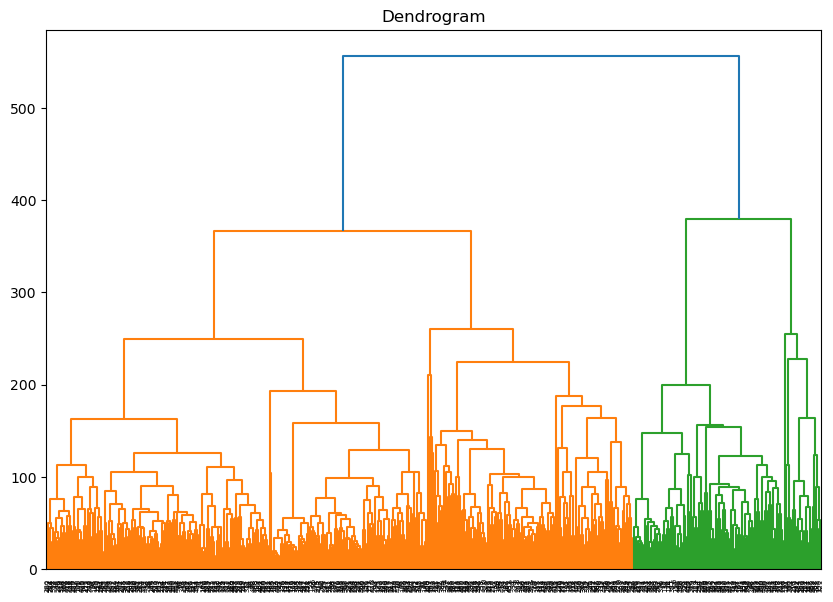

In [117]:
# linkage determines the distance between two clusters as the shortest distance 
#between any two points in the two clusters.
Z= linkage(df_return, method="ward", metric="euclidean")
plt.figure(figsize=(10,7))
#A dendrogram is a diagram that shows the hierarchical relationship between objects.
dendrogram(Z)
plt.title('Dendrogram')

In [49]:
#assign the cluster tag to each stock
df_return["clusters"] = cut_tree(Z, n_clusters=4).flatten()

In [50]:
#cluster return overview
df_return.groupby('clusters').mean().transpose()

clusters,0,1,2,3
Return2020.02,-6.353844,-10.716622,-5.795203,-17.067397
Return2020.03,-13.826593,-24.408300,-3.569751,-50.144131
Return2020.04,15.388097,11.220015,9.761814,50.829831
Return2020.05,8.682129,4.525458,4.366202,6.273077
Return2020.06,2.646764,1.469419,-1.915002,3.888861
Return2020.07,8.006457,2.651648,5.275613,-6.126068
Return2020.08,5.128842,7.456458,0.333709,3.950628
Return2020.09,-0.724868,-2.132798,-2.761810,-13.007624
Return2020.10,-0.156834,0.350817,-1.861707,-4.517538
Return2020.11,12.168841,20.537034,5.018590,38.623811


In [51]:
#cluster size overview
df_return.groupby('clusters').size()

clusters
0    211
1    161
2    102
3     24
dtype: int64

In [52]:
df = monthly_sector_return
df['clusters']=cut_tree(Z, n_clusters=4).flatten()

##### Cluster 0

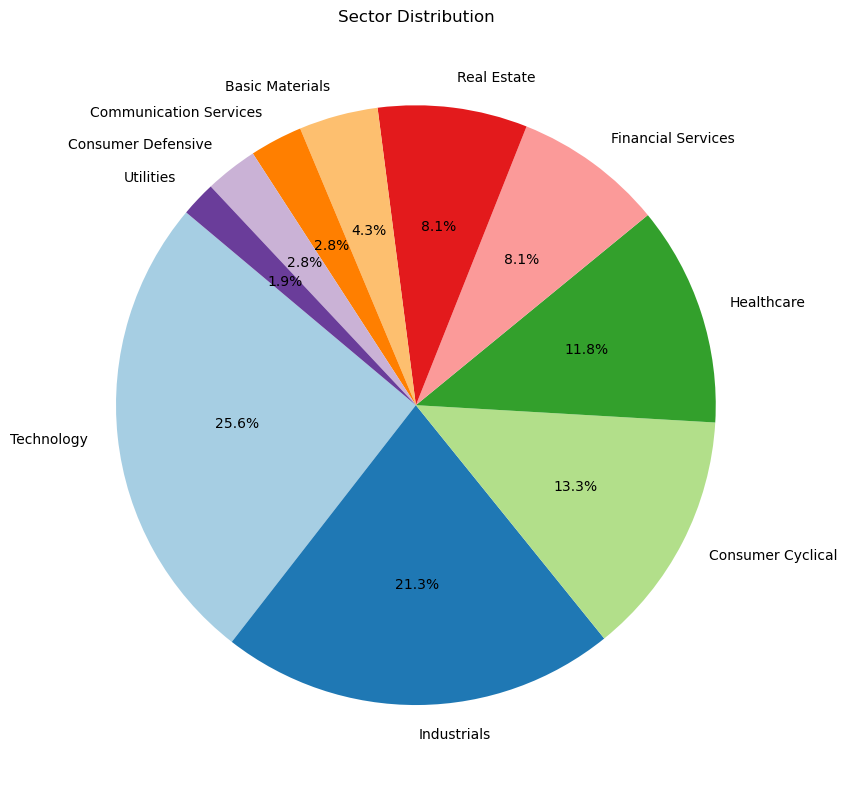

In [53]:
#Cluster 0
cluster0_sector = df[df['clusters']==0].groupby("Sector").count().sort_values(by = "Symbol", 
                                                                              ascending = False).iloc[:,0]
plt.figure(figsize=(10, 8))
plt.pie(cluster0_sector, labels=cluster0_sector.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sector Distribution')
plt.tight_layout()

##### Cluster 1

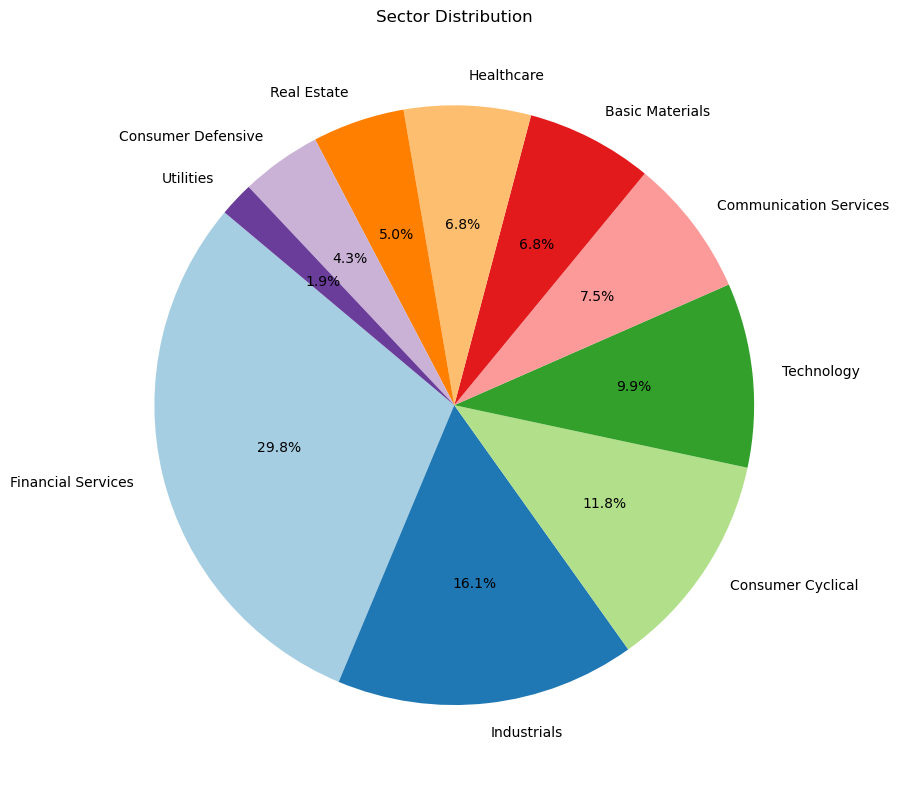

In [120]:
#Cluster 1
cluster1_sector = df[df['clusters']==1].groupby("Sector").count().sort_values(by = "Symbol", 
                                                                              ascending = False).iloc[:,0]
plt.figure(figsize=(10, 8))
plt.pie(cluster1_sector, labels=cluster1_sector.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sector Distribution')
plt.tight_layout()

##### Cluster 2

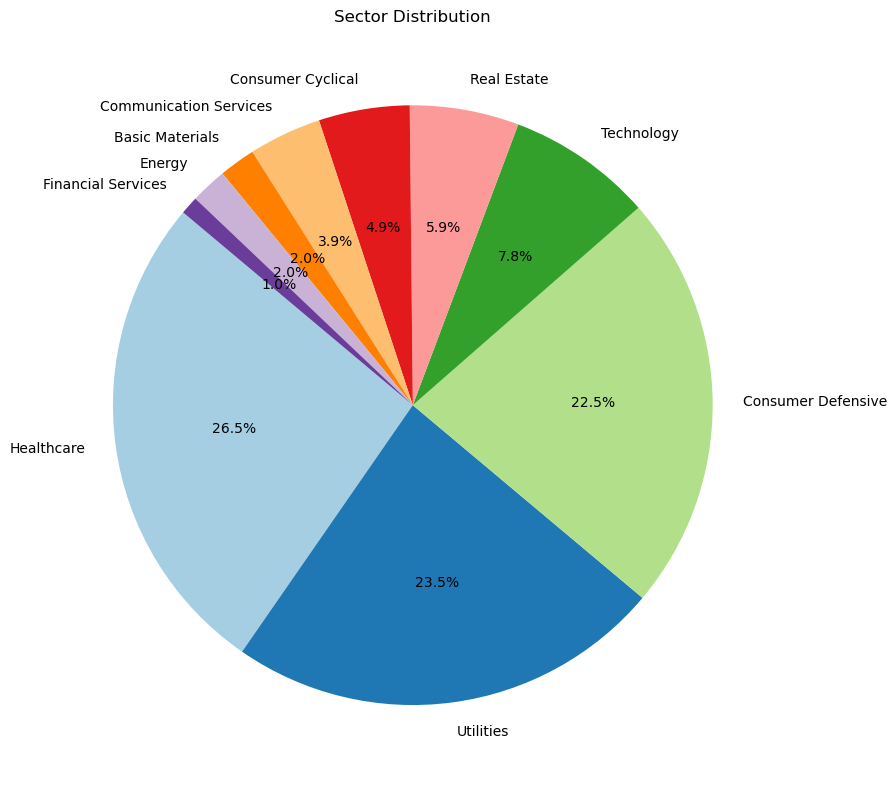

In [119]:
#Cluster 2
cluster2_sector = df[df['clusters']==2].groupby("Sector").count().sort_values(by = "Symbol", 
                                                                              ascending = False).iloc[:,0]
plt.figure(figsize=(10, 8))
plt.pie(cluster2_sector, labels=cluster2_sector.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sector Distribution')
plt.tight_layout()

##### Cluster 3

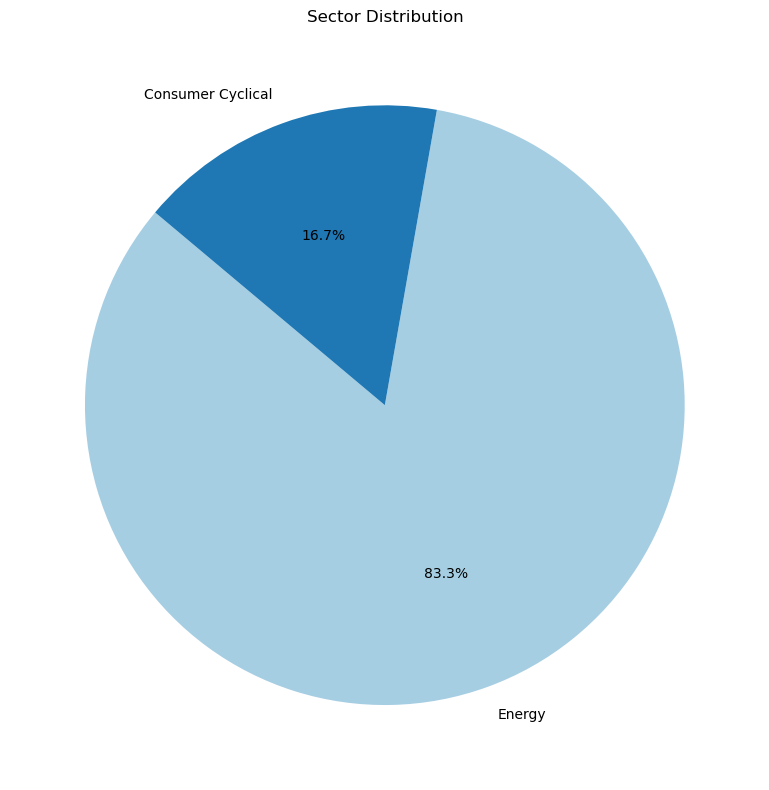

In [118]:
#Cluster 3
cluster3_sector = df[df['clusters']==3].groupby("Sector").count().sort_values(by = "Symbol", 
                                                                              ascending = False).iloc[:,0]
plt.figure(figsize=(10, 8))
plt.pie(cluster3_sector, labels=cluster3_sector.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sector Distribution')
plt.tight_layout()

**Cluster0**

There are 211 stocks in cluster 0. Technology and Industrial sectors account for 25.6% and 21.3% of the cluster, respectively. Consumer Cyclical sector and Healthcare sector are two close followers, and they combined to account for 25% of the cluster. Cluster 0 demonstrates an average monthly return of 1.4% during the pandemic.

**Cluster1**

There are 161 stocks in cluster 1. Financial Services sector accounts for the largest portion of this cluster at 29.8%. Industrial sector and Consumer Cyclical sector are the second and third largest composition in this cluster, and they combined to account for 27.9% of the cluster. Cluster 1 demonstrates an average monthly return of 0.942% during the pandemic.

**Cluster2**

There are 102 stocks in cluster 2. Healthcare sector, Utilities sector, and Consumer Defense sector account for 26.5%, 23.5%, and 22.5% of the cluster, respectively. Cluster 2 demonstrates an average monthly return of 0.773% during the pandemic.

**Cluster3**

There are only 24 stocks in cluster 3. Energy and Consumer Cyclical are the only two sectors in this cluster. Energy sector is dominating in this cluster, accounting for 83.3%. Cluster 3 demonstrates an average monthly return of 2.53% during the pandemic.

#### K-means clustering

In [57]:
#k-means is method of cluster analysis using a pre-specified no. of clusters.
KMEANS = KMeans(n_clusters=4, random_state=42)
KMEANS.fit(df_return)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [58]:
#The Cluster column represents the cluster assigned by k-means.
#The cluster column represents the cluster assigned by hierarchical clustering.
df_return['Clusters']=KMEANS.predict(df_return)

#### Cluster Results

In [59]:
#Average monthly return of each cluster (hierarchical)
avg_h_cluster_return = df_return.groupby('clusters').mean().transpose().mean()
avg_h_cluster_return

clusters
0    1.399666
1    0.941880
2    0.773363
3    2.519790
dtype: float64

In [60]:
#Average monthly return of each cluster (k-means)
avg_k_cluster_return = df_return.groupby('Clusters').mean().transpose().mean()
avg_k_cluster_return

Clusters
0    2.561841
1    0.762116
2    1.984481
3    0.969568
dtype: float64

Two clustering method shows slightly different cluster returns and the rest of analysis will proceed using hierarchical analysis.

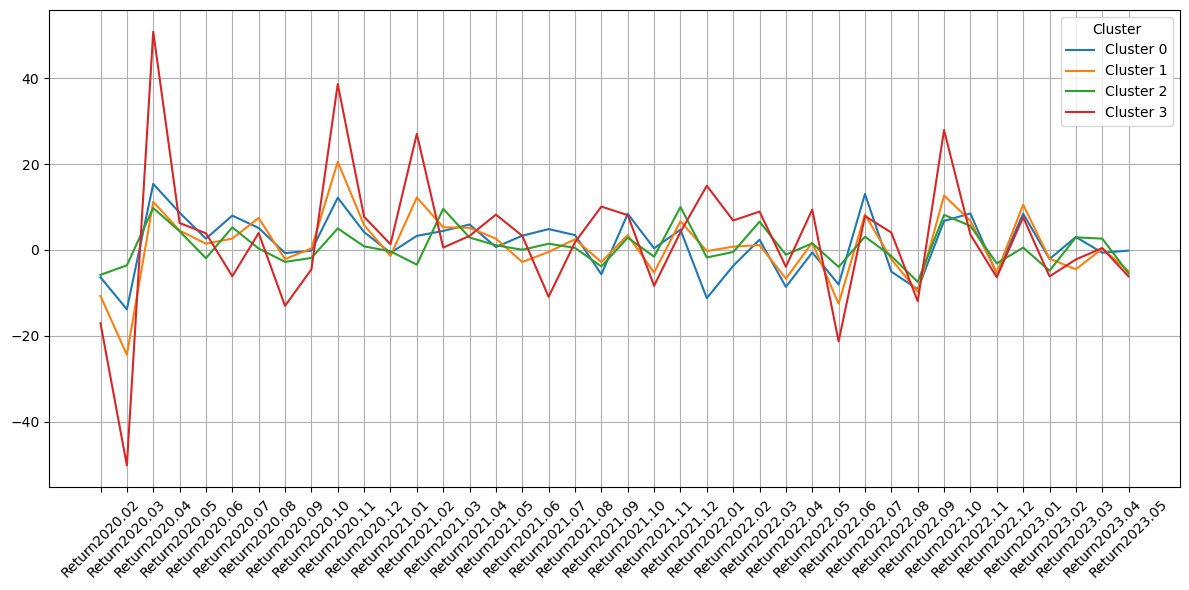

In [61]:
#visualize the return fluctuation
H_cluster = df_return.groupby('clusters').mean()
H_cluster = H_cluster.drop(columns='Clusters').transpose()
plt.figure(figsize=(12, 6))
for column in H_cluster.columns:
    plt.plot(H_cluster[column], label=f'Cluster {column}')
plt.legend(title='Cluster')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

The cluster 3 shows the largest fluctuation during the pandemic. I can expect a more volatile return if my portfolio consists stocks that are in this cluster. Therefore, by looking at the composition of the cluster, I can build a portfolio matching my investment profile.

### Step 5: Portfolio Optimization(Research Question 3)

In [106]:
def optimized_portfolio(stock_return_clustered, risk_aversion):
    """
    Takes in the dataframe with clusters assigned to each stock and the risk 
    aversion(int)of the investor. Risk aversion = 0~3(risk-averse~risk-seeking).
    Returns a list of 10 stock symbols optimized according to risk aversion.
    For risk-averse investors(0,1), choose the cluster with the lowest standard 
    deviation, and select the ten stocks with the lowest beta. 
    For risk-seeking investors(2,3), choose the cluster with the highest standard 
    deviation, and select the ten stocks with the highest beta.
    """
    portfolio = []
    cluster_return = stock_return_clustered.drop(["Symbol", "Sector", "Industry"], axis = 1).groupby('clusters').mean()
    std_dev = cluster_return.std(axis=1)
    sort_std = std_dev.sort_values()
    filtered_beta = {}
    stock = list(stock_return_clustered[stock_return_clustered['clusters'] == sort_std.index[risk_aversion]]['Symbol'])
    beta = stock_beta(stock)
    for key, value in beta.items():
        if value is not None:
            filtered_beta[key] = value
    if risk_aversion >= 2:
        beta_sorted = sorted(filtered_beta.items(), key=lambda item: item[1], reverse=True)[:10]
    else:
        beta_sorted = sorted(filtered_beta.items(), key=lambda item: item[1])[:10]
    for key, value in beta_sorted:
        portfolio.append(key)
    
    return portfolio

assert optimized_portfolio(df, 2) == ['MGM', 'FCX', 'WYNN', 'PARA', 'APTV', 'EXPE', 'SPG', 'URI', 'HCA', 'ZBRA']

In [74]:
def portfolio_return(portfolio, stock_return_clustered):
    """
    Takes in the portfolio (list of symbols) and the dataframe with clusters assigned 
    to each stock. Returns the expected return with a $1M initial investment from the
    beginning of COVID-19 till its end. Every stock accounts for the same share in
    the portfolio.
    """
    return_columns = [_return for _return in stock_return_clustered.columns if _return.startswith('Return')]
    return_list = []
    for stock in portfolio:
        r = stock_return_clustered[stock_return_clustered['Symbol'] == stock][return_columns].mean(axis=1)
        return_list.append(r)
        avg_return = np.mean(return_list)
    
    return avg_return*1000000

assert portfolio_return(big7_tickers, df) == 3027404.4164091405

#### Risk-Averse Portfolio

In [64]:
#Optimized portfolio for risk-averse investors
risk_averse_p = optimized_portfolio(df, 'risk-averse')
risk_averse_p

['BIIB', 'GIS', 'REGN', 'CPB', 'GILD', 'CTRA', 'HRL', 'SJM', 'CAG', 'ED']

In [65]:
#Expected return for risk-averse portfolio
portfolio_return(risk_averse_p, df)

1057997.581180557

#### Risk-Seeking Portfolio

In [66]:
#Optimized portfolio for risk-seeking investors
risk_seeking_p = optimized_portfolio(df, 'risk-seeking')
risk_seeking_p

['APA', 'CZR', 'NCLH', 'CCL', 'RCL', 'TRGP', 'MRO', 'DVN', 'HAL', 'FANG']

In [67]:
#Expected return for risk-seeking portfolio
portfolio_return(risk_seeking_p, df)

3098374.5430489364

The risk-averse portfolio consists of 'BIIB', 'GIS', 'REGN', 'CPB', 'GILD', 'CTRA', 'HRL', 'SJM', 'CAG', 'ED'. The expected value of the portfolio will grew from 1M to 1,057,997.58 if the investor bought the stocks in the beginning of the pandemic.

The risk-seeking portfolio consists of 'APA', 'CZR', 'NCLH', 'CCL', 'RCL', 'TRGP', 'MRO', 'DVN', 'HAL', 'FANG'. The expected value of the portfolio will grow from 1M to 3,098,374.54 if the investor bought the stocks in the beginning of the pandemic.

## Implications and Limitations

*A long-term investor will benefit from my analysis but a short-term investor might find this analysis useless. From the linear regression model we can concludes that even in the black swan event, the price of the stock is nearly unpredictable with the independent variables we have. But the rule of thumb tells us that long term investment is always profitable. Even if your portfolio lose half of the value in one month like cluster 3, it will bouce back at some point in the future. For both risk-seeking and risk-averse investors, the best investment strategy is to invest in a long term. For the portfolio optimization, a better way is to use the monte carlo simulation to repeatedly test the best combination of stocks. In reality, the best stock allocation will not be evenly distrbuted and some stock should weigh more than others. However, the logic behind the analysis still provides a good sense of how different type of investor should select the stocks matching their risk profile.*